### Import basic librarys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

### Read the data

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# Data Cleaning 

### Let's see if there is any missing data

In [5]:

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull())*100, 2)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


### if any duplicate values

In [6]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


### Data types of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Converting budget and gross data types from float to int

In [8]:
df.dropna(subset=["budget","gross"], inplace=True)

In [9]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

### reset_index

In [10]:
df.reset_index(drop=True,inplace=True)

### year column doen't match with the released date so will correct

In [11]:
df["year_correct"] = df["released"].str.split(", ").str[1]
df["year_correct"] = df["year_correct"].str.split(" ").str[0]

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
# df["year_correct"].value_counts()

In [14]:
df["year_correct"].fillna(df["year_correct"].mode()[1], inplace=True)


In [15]:
df["year_correct"] = df["year_correct"].astype('int')

In [16]:
df["year_correct"].unique()

array([1980, 1981, 1984, 1983, 1982, 2011, 1987, 1985, 1986, 1990, 1988,
       1992, 1989, 1991, 2001, 1999, 1994, 1993, 1995, 1996, 2000, 1997,
       1998, 2002, 2003, 2004, 2014, 2005, 2006, 2007, 2008, 2010, 2009,
       2013, 2016, 2015, 2012, 2017, 2018, 2019, 2020])

### Are there outliers?


<AxesSubplot:>

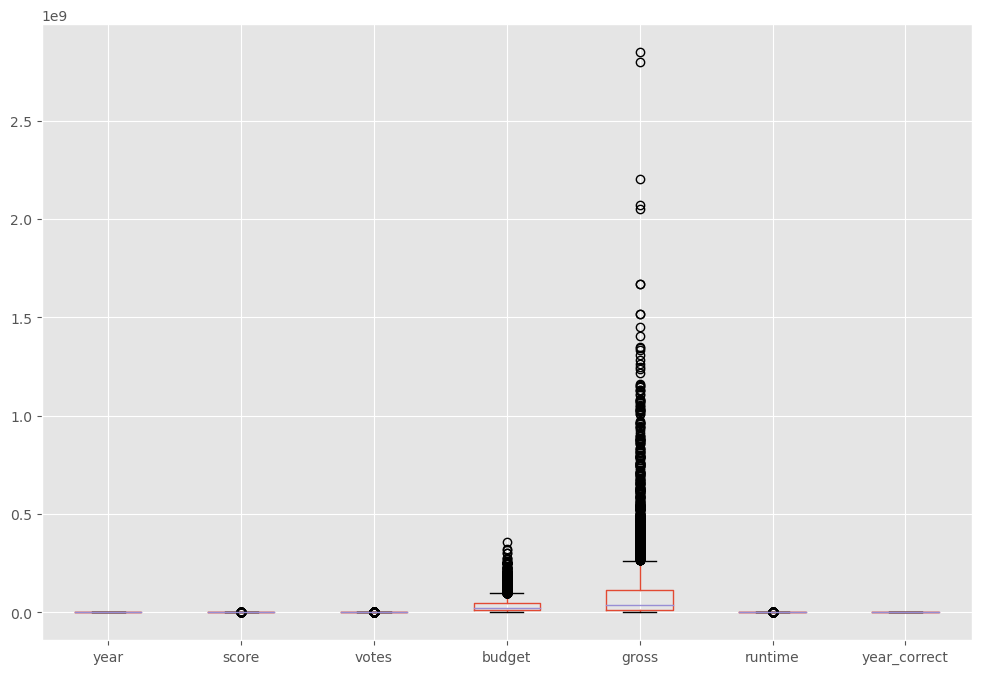

In [17]:

df.boxplot()

<AxesSubplot:>

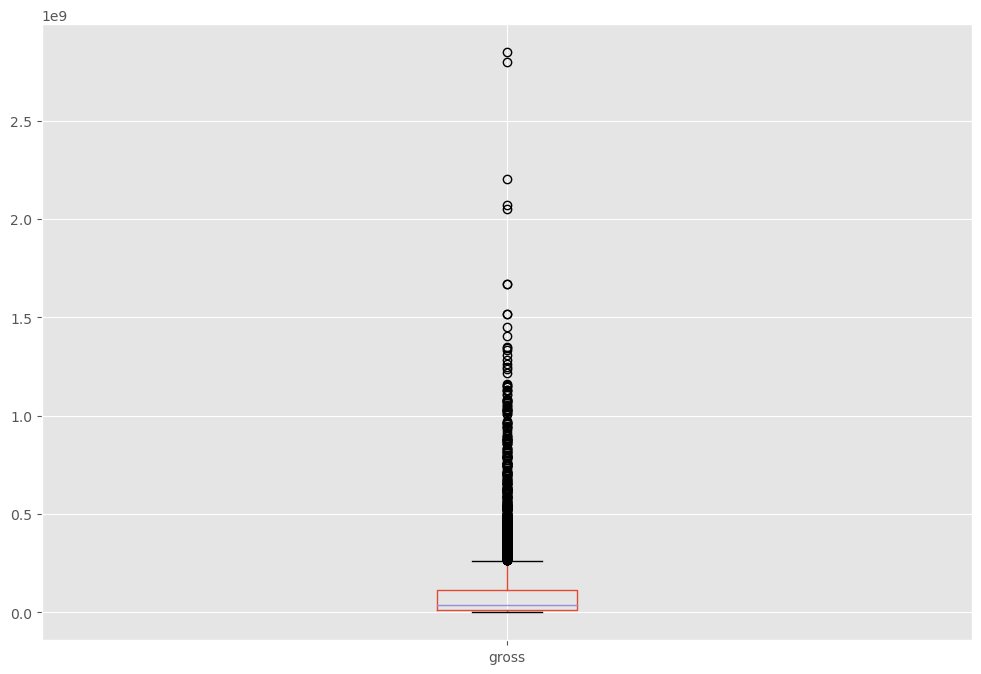

In [18]:
df.boxplot(column=['gross'])

# Correlation

* budget will have high relation with gross
* company hogh relation
Let's see

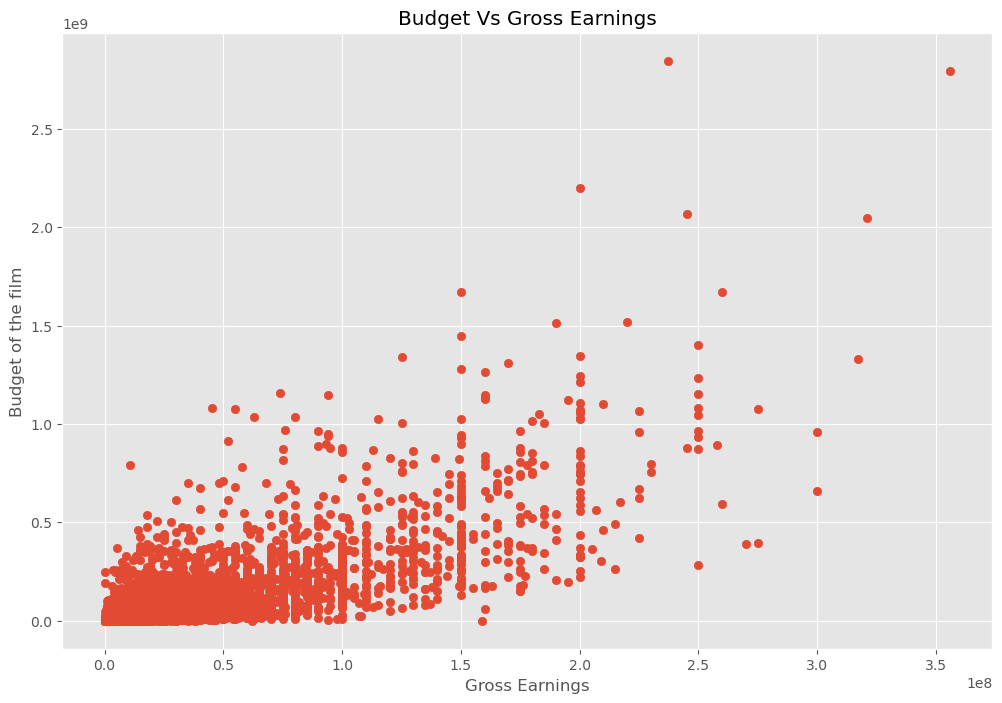

In [19]:
# Scatter plot with budget vs gross

plt.scatter(x="budget", y="gross", data=df)
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget of the film");


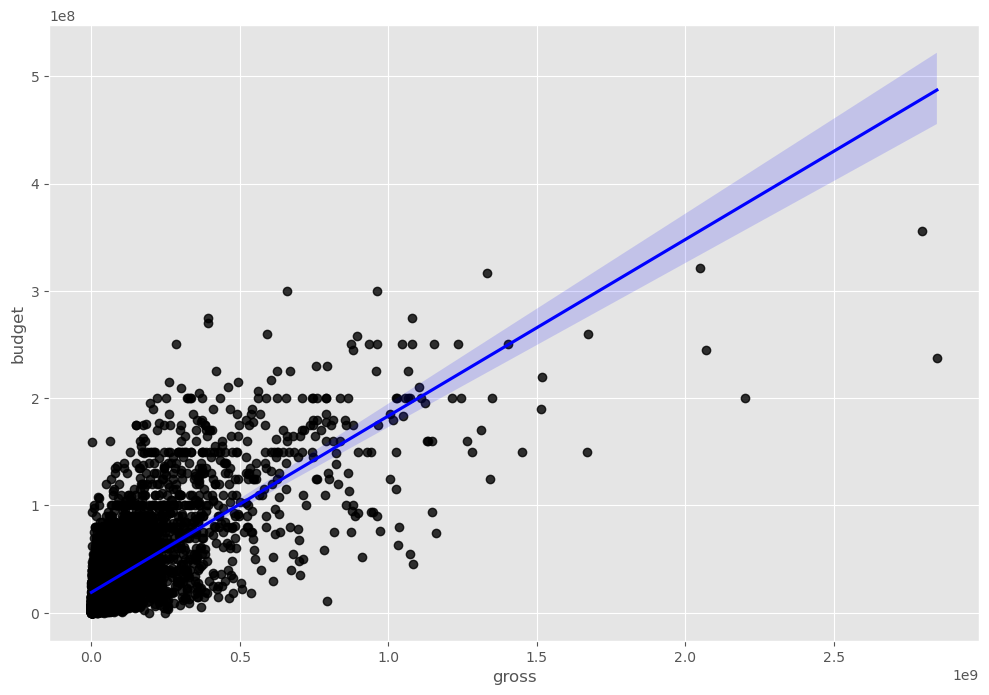

In [20]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"black"}, line_kws={"color":"blue"});

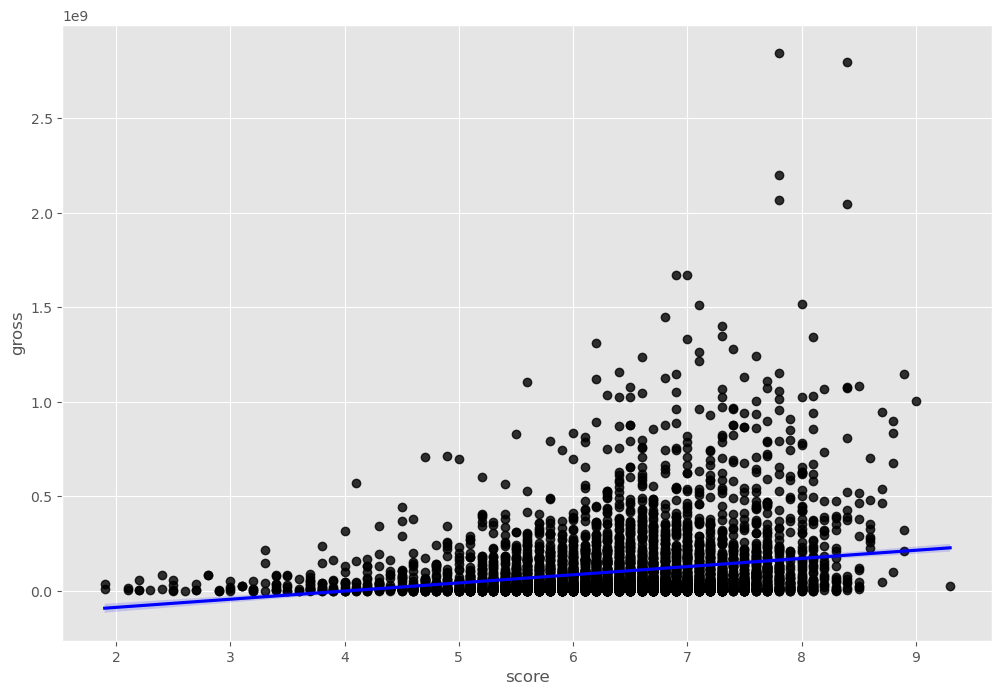

In [21]:

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"black"}, line_kws={"color":"blue"});

In [22]:
df.corr(method="pearson")  # Pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.993502
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.059748
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.200401
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.317413
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.266457
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.073375
year_correct,0.993502,0.059748,0.200401,0.317413,0.266457,0.073375,1.000000


In [23]:
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106,0.985816
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872,0.041993
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616,0.287754
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879,0.209824
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825,0.227259
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000,0.063496
year_correct,0.985816,0.041993,0.287754,0.209824,0.227259,0.063496,1.000000


In [24]:
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396,0.993626
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040,0.061581
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959,0.415390
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276,0.296861
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121,0.333006
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000,0.093540
year_correct,0.993626,0.061581,0.415390,0.296861,0.333006,0.093540,1.000000


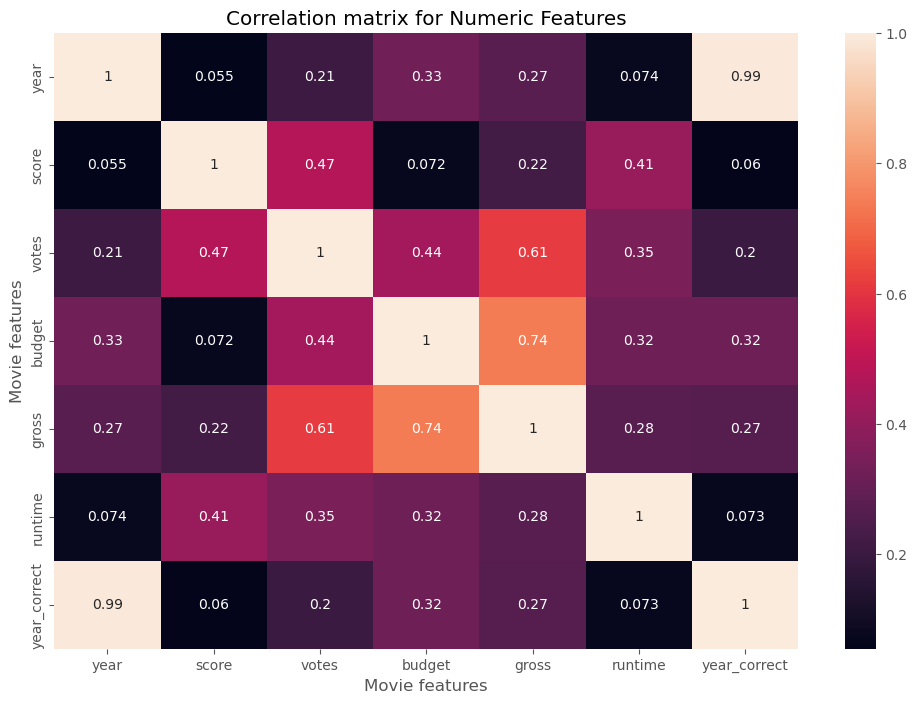

In [25]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [26]:
# df = df.sort_values(by=["gross"],inplace=True, ascending=False)

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5436 non-null   object 
 1   rating        5424 non-null   object 
 2   genre         5436 non-null   object 
 3   year          5436 non-null   int64  
 4   released      5436 non-null   object 
 5   score         5436 non-null   float64
 6   votes         5436 non-null   float64
 7   director      5436 non-null   object 
 8   writer        5436 non-null   object 
 9   star          5436 non-null   object 
 10  country       5435 non-null   object 
 11  budget        5436 non-null   int64  
 12  gross         5436 non-null   int64  
 13  company       5434 non-null   object 
 14  runtime       5435 non-null   float64
 15  year_correct  5436 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 658.4+ KB


In [30]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,1980
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,1980
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,1980
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,1980
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,1980


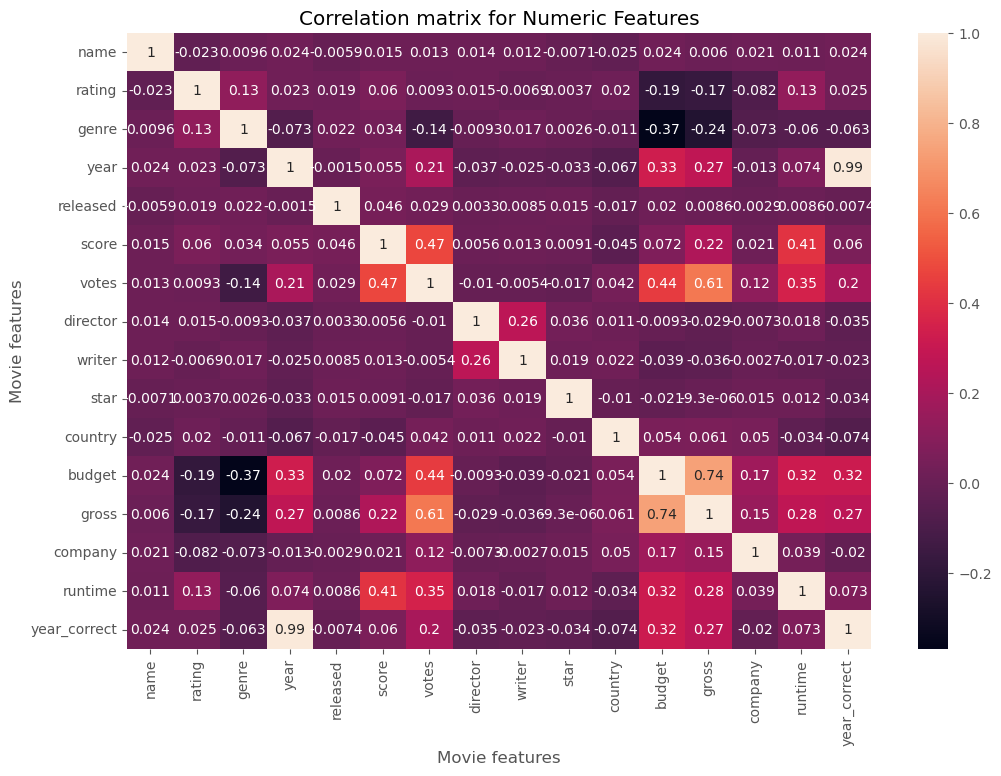

In [31]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

* gross vs budget = 74% correlated
* gross vs votes = 61% correlated


In [32]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.023013
              genre           0.009617
              year            0.024435
              released       -0.005896
              score           0.014955
              votes           0.012915
              director        0.013699
              writer          0.011602
              star           -0.007109
              country        -0.024555
              budget          0.023698
              gross           0.005966
              company         0.021209
              runtime         0.010800
              year_correct    0.024049
rating        name           -0.023013
              rating          1.000000
              genre           0.128102
              year            0.022668
              released        0.018836
              score           0.059550
              votes           0.009255
              director        0.014847
              writer         -0.006923
              star       

In [33]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368900
genre         budget         -0.368900
              gross          -0.244380
gross         genre          -0.244380
rating        budget         -0.186892
budget        rating         -0.186892
gross         rating         -0.168814
rating        gross          -0.168814
votes         genre          -0.136457
genre         votes          -0.136457
company       rating         -0.082189
rating        company        -0.082189
country       year_correct   -0.074461
year_correct  country        -0.074461
company       genre          -0.073293
genre         company        -0.073293
year          genre          -0.073026
genre         year           -0.073026
year          country        -0.066662
country       year           -0.066662
year_correct  genre          -0.063421
genre         year_correct   -0.063421
              runtime        -0.060186
runtime       genre          -0.060186
score         country        -0.044690
country       score      

In [34]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
year_correct  year            0.993502
year          year_correct    0.993502
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

* Votes and budget have the highest correlation to gross earnings
* Company has low correlation


In [35]:
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1432    54773202654
1403    51241105418
454     42356430218
1114    40021704691
1388    39542573303
1429    35833650748
1048    19628786232
987     15065592411
552     11873612858
553     11593807697
1373    10664679494
1005     8937010092
1315     8318570396
1140     7886344526
684      7243673721
Name: gross, dtype: int64

In [36]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company  year
1429     2019    5773131804
987      2018    4018631866
1403     2015    3834354888
1388     2009    3793491246
1429     2017    3789382071
1114     2011    3565705182
1432     2011    3223799224
1429     2010    3104474158
1114     2014    3071298586
454      2006    2934631933
         2019    2932757449
987      2019    2797501328
1432     2018    2774168962
454      2011    2738363306
1432     2005    2688767210
Name: gross, dtype: int64